<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 2 Assignment 1*

Analyze a corpus of text using text visualization of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Stemming
- Lemmatization
- Custom stopword removal
- Using frequency based stopwrod removal

You are free to use any dataset you are interested in. Kaggle is a great place to start. Feel free to sample the data if the dataset is too large to hanlde in memory. 

In [1]:
"""
Import Statements
"""

# Base
from collections import Counter
import re

import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

nlp = spacy.load("en_core_web_sm")

In [2]:
#state of union addresses:
data = 'https://raw.githubusercontent.com/mkirby1995/NLP/master/State_of_Unions.json'
df = pd.read_json(data)
df = df.sort_values(by = ['year']).drop(125).reset_index(drop=True)

df.head()

,president,year,content
0,Washington,1791,Fellow-Citizens of the Senate and House of Rep...
1,Washington,1792,Fellow-Citizens of the Senate and House of Rep...
2,Washington,1793,Fellow-Citizens of the Senate and House of Rep...
3,Washington,1794,Fellow-Citizens of the Senate and House of Rep...
4,Washington,1795,Fellow-Citizens of the Senate and House of Rep...


In [3]:
df.shape

(227, 3)

In [4]:
#lowercase all the words:
df['content'] = df['content'].apply(lambda x: x.lower())

In [6]:
tokenizer = Tokenizer(nlp.vocab)
tokens = []

""" Make the tokens """
for doc in tokenizer.pipe(df['content']):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)
    
df['tokens'] = tokens
df.head()

,president,year,content,tokens
0,Washington,1791,fellow-citizens of the senate and house of rep...,"[fellow-citizens, of, the, senate, and, house,..."
1,Washington,1792,fellow-citizens of the senate and house of rep...,"[fellow-citizens, of, the, senate, and, house,..."
2,Washington,1793,fellow-citizens of the senate and house of rep...,"[fellow-citizens, of, the, senate, and, house,..."
3,Washington,1794,fellow-citizens of the senate and house of rep...,"[fellow-citizens, of, the, senate, and, house,..."
4,Washington,1795,fellow-citizens of the senate and house of rep...,"[fellow-citizens, of, the, senate, and, house,..."


In [7]:
#count function:

def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = list(zip(word_counts.keys(), word_counts.values()))
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = list(zip(appears_in.keys(), appears_in.values()))
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [8]:
#Stemming:
from nltk.stem import PorterStemmer

def get_stems(tokens):
    ps = PorterStemmer()
    stems = []

    for token in tokens:
        token_stems = []
        for word in token:
            token_stems.append(ps.stem(word))
        stems.append(token_stems)
    return stems

df['stems'] = get_stems(df['tokens'])
df.head()

,president,year,content,tokens,stems
0,Washington,1791,fellow-citizens of the senate and house of rep...,"[fellow-citizens, of, the, senate, and, house,...","[fellow-citizen, of, the, senat, and, hous, of..."
1,Washington,1792,fellow-citizens of the senate and house of rep...,"[fellow-citizens, of, the, senate, and, house,...","[fellow-citizen, of, the, senat, and, hous, of..."
2,Washington,1793,fellow-citizens of the senate and house of rep...,"[fellow-citizens, of, the, senate, and, house,...","[fellow-citizen, of, the, senat, and, hous, of..."
3,Washington,1794,fellow-citizens of the senate and house of rep...,"[fellow-citizens, of, the, senate, and, house,...","[fellow-citizen, of, the, senat, and, hous, of..."
4,Washington,1795,fellow-citizens of the senate and house of rep...,"[fellow-citizens, of, the, senate, and, house,...","[fellow-citizen, of, the, senat, and, hous, of..."


In [9]:
wc = count(df['stems'])

wc_top20 = wc[wc['rank'] <= 20]

wc_top20

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
398,the,227,149148,1.0,0.077647,0.077647,1.000000
87,\n,227,135374,2.0,0.070477,0.148124,1.000000
440,of,227,96247,3.0,0.050107,0.198231,1.000000
219,to,227,60202,4.0,0.031342,0.229572,1.000000
427,and,227,59887,5.0,0.031178,0.260750,1.000000
343,in,227,38294,6.0,0.019936,0.280686,1.000000
156,a,227,27743,7.0,0.014443,0.295129,1.000000
650,that,227,21183,8.0,0.011028,0.306157,1.000000
333,\n\n,227,20904,9.0,0.010883,0.317040,1.000000
28,it,227,19681,10.0,0.010246,0.327286,1.000000


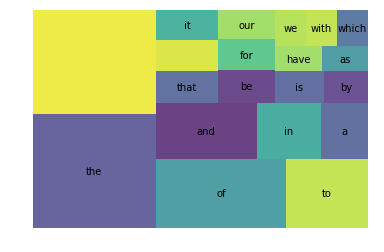

In [10]:
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [11]:
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_!= 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [12]:
df['lemmas'] = df['content'].apply(get_lemmas)
df.head()

,president,year,content,tokens,stems,lemmas
0,Washington,1791,fellow-citizens of the senate and house of rep...,"[fellow-citizens, of, the, senate, and, house,...","[fellow-citizen, of, the, senat, and, hous, of...","[fellow, citizen, senate, house, representativ..."
1,Washington,1792,fellow-citizens of the senate and house of rep...,"[fellow-citizens, of, the, senate, and, house,...","[fellow-citizen, of, the, senat, and, hous, of...","[fellow, citizen, senate, house, representativ..."
2,Washington,1793,fellow-citizens of the senate and house of rep...,"[fellow-citizens, of, the, senate, and, house,...","[fellow-citizen, of, the, senat, and, hous, of...","[fellow, citizen, senate, house, representativ..."
3,Washington,1794,fellow-citizens of the senate and house of rep...,"[fellow-citizens, of, the, senate, and, house,...","[fellow-citizen, of, the, senat, and, hous, of...","[fellow, citizen, senate, house, representativ..."
4,Washington,1795,fellow-citizens of the senate and house of rep...,"[fellow-citizens, of, the, senate, and, house,...","[fellow-citizen, of, the, senat, and, hous, of...","[fellow, citizen, senate, house, representativ..."


In [13]:
wc = count(df['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

wc_top20

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
81,\n,227,135374,1.0,0.142289,0.142289,1.000000
259,\n\n,227,20904,2.0,0.021972,0.164261,1.000000
173,state,227,8769,3.0,0.009217,0.173478,1.000000
553,government,226,7911,4.0,0.008315,0.181793,0.995595
374,year,225,6242,5.0,0.006561,0.188354,0.991189
364,congress,227,4986,6.0,0.005241,0.193594,1.000000
534,united,226,4745,7.0,0.004987,0.198582,0.995595
449,country,226,4439,8.0,0.004666,0.203248,0.995595
235,people,219,4250,9.0,0.004467,0.207715,0.964758
164,great,225,4132,10.0,0.004343,0.212058,0.991189


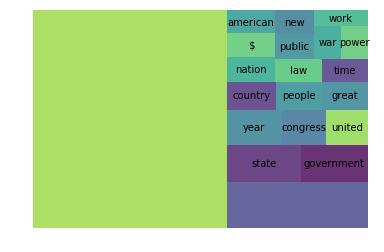

In [14]:
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [15]:
#Custom stopword removal

STOP_WORDS = nlp.Defaults.stop_words.union(['\n', '\n\n', 'united', 'states', 'government', 'congress', 'country'])

In [36]:
def get_custom_stop_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    for token in doc: 
        if ((token.text not in STOP_WORDS) and (token.is_punct == False)) and (token.pos_!= 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [37]:
df['custom_stop_lemmas'] = df['content'].apply(get_custom_stop_lemmas)

In [39]:
wc = count(df['custom_stop_lemmas'])
wc_top20 = wc[wc['rank'] <= 20]
wc_top20

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
371,year,225,6242,1.0,0.008123,0.008123,0.991189
234,people,219,4250,2.0,0.005531,0.013654,0.964758
163,great,225,4132,3.0,0.005377,0.019031,0.991189
188,nation,226,3876,4.0,0.005044,0.024075,0.995595
951,$,193,3632,5.0,0.004726,0.028801,0.850220
1398,american,212,3545,6.0,0.004613,0.033415,0.933921
79,law,217,3402,7.0,0.004427,0.037842,0.955947
319,time,227,3321,8.0,0.004322,0.042164,1.000000
545,public,219,3066,9.0,0.003990,0.046153,0.964758
130,new,220,2968,10.0,0.003862,0.050016,0.969163


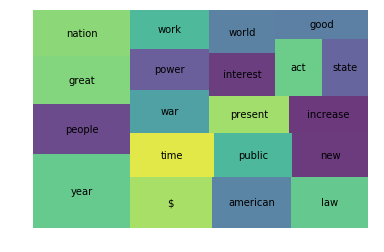

In [40]:
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Stretch Goals

* Write a web scraper that can scrape "Data Scientist" job listings from indeed.com.
* Look ahead to some of the topics from later this week:
 - Part of Speech Tagging
 - Named Entity Recognition
 - Document Classification
* Try a different visualization techniques
* Automate the process of retriving job listings. ;)